# Muhammad Nanda Arjuna Fadhillah
# 2109106028
# Informatika A1 2021

# Import Library

In [29]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Membaca Dataset

In [3]:
df = pd.read_csv("whoDeaths.csv")
df.head()

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100
0,Armenia,2006,3219235.0,54404,78,5.85,3.38,4.99,5.36
1,Armenia,2007,3107395.5,53660,0,5.50,3.38,4.99,5.02
2,Armenia,2008,3234031.0,54824,63,6.64,3.38,4.99,4.23
3,Armenia,2009,3066044.0,55120,53,8.44,3.38,4.99,4.06
4,Armenia,2012,3024127.0,55200,79,9.13,3.38,4.99,6.39


# Data NULL

In [4]:
df.isnull().sum()

Country_Name         0
Year                 0
Population           0
Deaths_All_Types     0
Deaths_Suicides      0
HExp_Pctage_Y        0
MHExp_Pctage_2011    0
Dep_Num_2015         0
Suicide_p100         0
dtype: int64

# Data Duplikat

In [5]:
df[df.duplicated()]

,Country_Name,Year,Population,Deaths_All_Types,Deaths_Suicides,HExp_Pctage_Y,MHExp_Pctage_2011,Dep_Num_2015,Suicide_p100


In [7]:
print("Banyak Nilai Duplikat = ",df.duplicated().sum())


Banyak Nilai Duplikat =  0


# Normalisasi

In [8]:
from sklearn.preprocessing import MinMaxScaler


In [9]:
mms = MinMaxScaler()

In [11]:
x_norm = mms.fit_transform(df[["Population"]])

In [ ]:
datanormalisasi = pd.DataFrame(x_norm)
datanormalisasi.head(10)

# Standarisasi

In [12]:
# Import Library yang akan digunakan
from sklearn.preprocessing import StandardScaler


In [13]:
standard = StandardScaler()

In [14]:
x_standard = standard.fit_transform(df[["Population", "Deaths_All_Types", "Deaths_Suicides", "MHExp_Pctage_2011", "Dep_Num_2015"]])

In [15]:
print("Nilai sesudah di standarisasi : ", np.nanstd(x_standard))

Nilai sesudah di standarisasi :  1.0


In [16]:
subset = df[['Population', 'Deaths_All_Types']]

In [17]:
x_scaled = standard.fit_transform(subset)

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(n_clusters = 3, random_state = 0)
km.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

In [20]:
labels = km.labels_
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [23]:
kmeans = pd.DataFrame({'labels':labels, 'Population':df.Population})

In [24]:
crosstab = pd.crosstab(kmeans['labels'], kmeans['Population'])
crosstab

Population,281154.0,285054.0,287559.0,289272.0,292587.0,295864.0,304334.0,311396.0,318041.0,319013.5,...,125958000.0,126008000.0,126085000.0,126140000.0,126154000.0,126176000.0,126180000.0,126204902.0,126381728.0,210147125.0
labels,,,,,,,,,,,,,,,,,,,,,
0,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
scalex = x_scaled[:, 0]
scaley = x_scaled[:, 1]

In [26]:
centroids = km.cluster_centers_
x_centroids = centroids[:, 0]
y_centroids = centroids[:, 1]

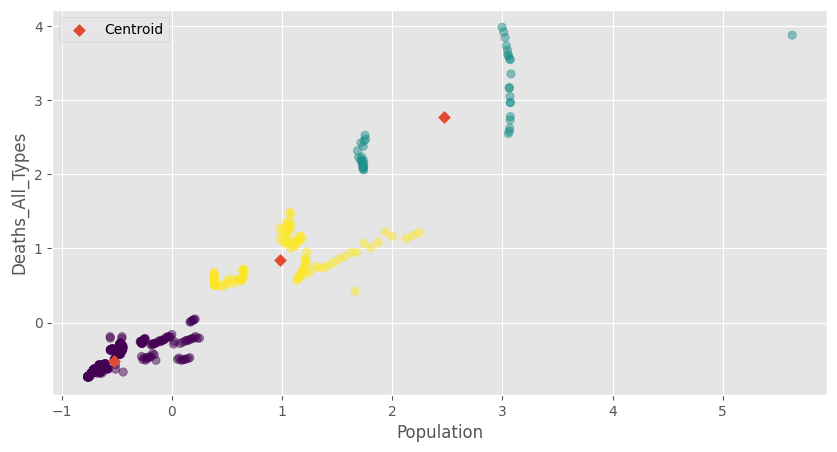

In [27]:
plt.figure(figsize = (10,5))
plt.style.use('ggplot') # untuk menampilkan grid background #
plt.scatter(scalex, scaley, c = labels, alpha = 0.5)
plt.scatter(x_centroids, y_centroids, marker = 'D', label = "Centroid")
plt.xlabel("Population")
plt.ylabel("Deaths_All_Types")
plt.legend()
plt.show()

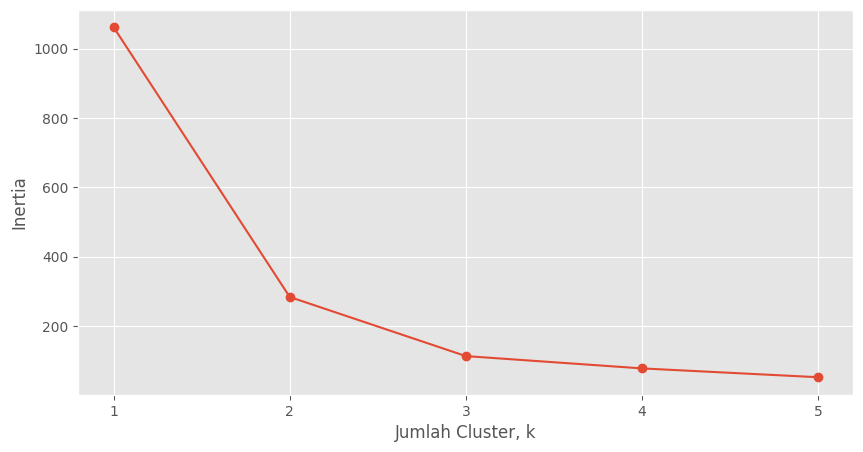

In [28]:
ks = range(1, 6)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(x_scaled)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.figure(figsize=(10,5))
plt.plot(ks, inertias, '-o')
plt.xlabel('Jumlah Cluster, k')
plt.ylabel('Inertia')
plt.xticks(ks)
plt.show()